In [23]:
import pandas as pd 
import matplotlib.pyplot as plt

In [15]:
df_posts = pd.read_csv("../data/processed/cleaned_post_sentiment.csv",index_col=False)

df_posts['Date'] = pd.to_datetime(df_posts['Date'], utc=True)
df_posts.set_index('Date',inplace=True)

daily_agg = df_posts.resample('D').agg({
    'body': 'count',
    'score':'sum',
    'sentiment':'mean'
}).rename(columns={'body':'post_count','score':'net_score','sentiment':'mean_sentiment'})
daily_weighted = df_posts.resample('D').apply(lambda x: (x['sentiment'] * x['score']).sum() / x['score'].sum() if x['score'].sum() != 0 else 0)
daily_agg['weighted_sentiment_score'] = daily_weighted
print(daily_agg.head())


                           post_count  net_score  mean_sentiment  \
Date                                                               
2020-01-01 00:00:00+00:00         113        107        0.182819   
2020-01-02 00:00:00+00:00         137        281        0.212144   
2020-01-03 00:00:00+00:00          97        198        0.177402   
2020-01-04 00:00:00+00:00         104        426        0.189708   
2020-01-05 00:00:00+00:00          90        130        0.223702   

                           weighted_sentiment_score  
Date                                                 
2020-01-01 00:00:00+00:00                  0.186014  
2020-01-02 00:00:00+00:00                  0.227949  
2020-01-03 00:00:00+00:00                  0.162982  
2020-01-04 00:00:00+00:00                  0.203904  
2020-01-05 00:00:00+00:00                  0.243579  


In [17]:
daily_agg.to_csv('../data/processed/aggregated_post_daily.csv')

In [ ]:
weekly_agg = df_posts.resample('W').agg({
    'body': 'count',
    'score':'sum',
    'sentiment':'mean'
}).rename(columns={'body':'post_count','score':'net_score','sentiment':'mean_sentiment'})
weekly_weight = df_posts.resample('W').apply(lambda x: (x['sentiment'] * x['score']).sum() / x['score'].sum() if x['score'].sum() != 0 else 0)
weekly_agg['weighted_sentiment_score'] = weekly_weight
print(weekly_agg.head())



                           post_count  net_score  mean_sentiment  \
Date                                                               
2020-01-05 00:00:00+00:00         541       1142        0.197399   
2020-01-12 00:00:00+00:00         669       1251        0.236993   
2020-01-19 00:00:00+00:00         950       1137        0.219723   
2020-01-26 00:00:00+00:00         953        956        0.202080   
2020-02-02 00:00:00+00:00        1063       1146        0.207676   

                           weighted_sentiment_score  
Date                                                 
2020-01-05 00:00:00+00:00                  0.205566  
2020-01-12 00:00:00+00:00                  0.225527  
2020-01-19 00:00:00+00:00                  0.236215  
2020-01-26 00:00:00+00:00                  0.205701  
2020-02-02 00:00:00+00:00                  0.216401  


In [22]:
weekly_agg.to_csv('../data/processed/aggregated_post_weekly.csv')

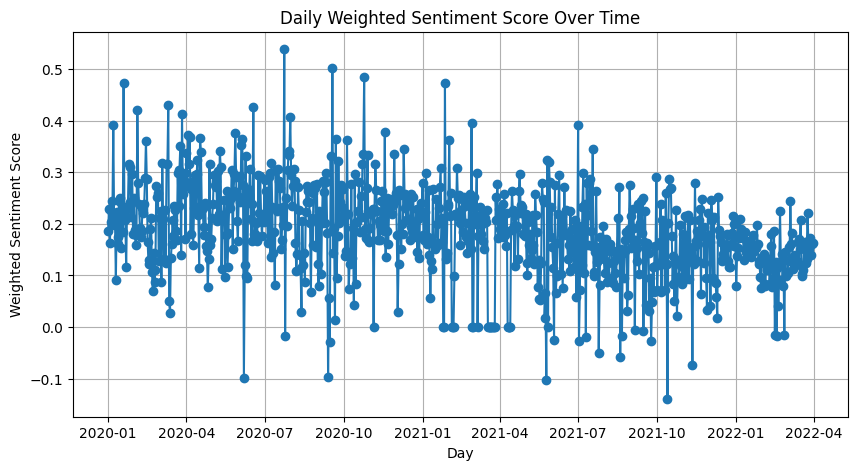

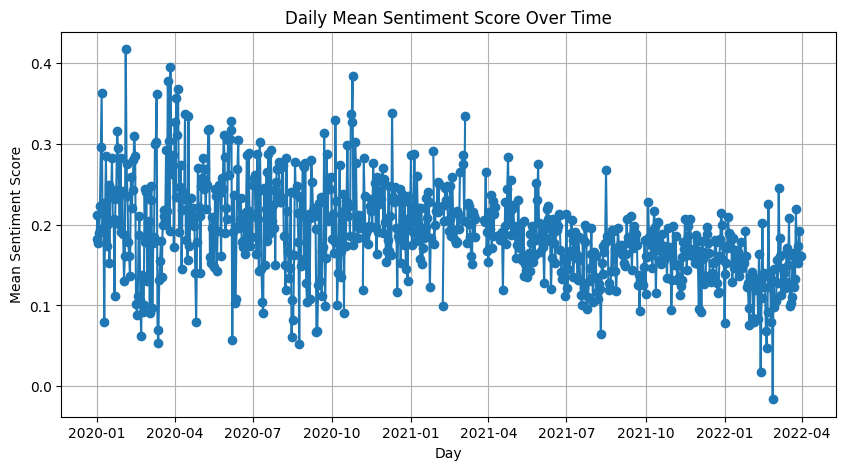

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(daily_agg.index, daily_agg['weighted_sentiment_score'], marker='o')
plt.title('Daily Weighted Sentiment Score Over Time')
plt.xlabel('Day')
plt.ylabel('Weighted Sentiment Score')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(daily_agg.index, daily_agg['mean_sentiment'], marker='o')
plt.title('Daily Mean Sentiment Score Over Time')
plt.xlabel('Day')
plt.ylabel('Mean Sentiment Score')
plt.grid(True)
plt.show()

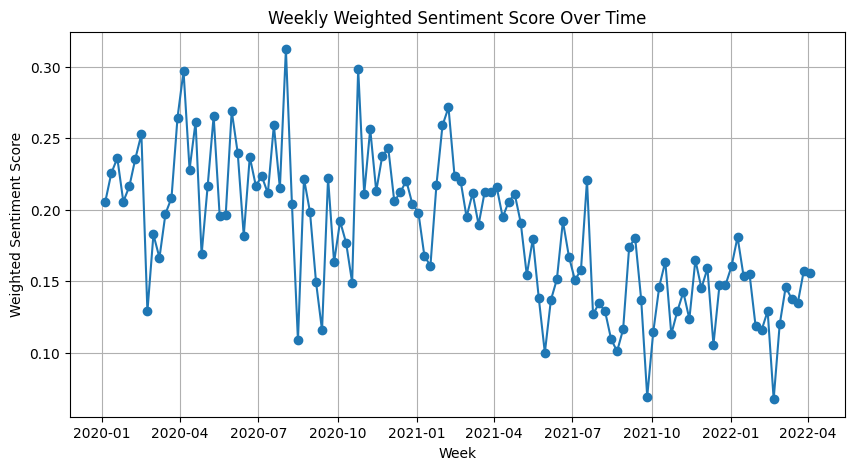

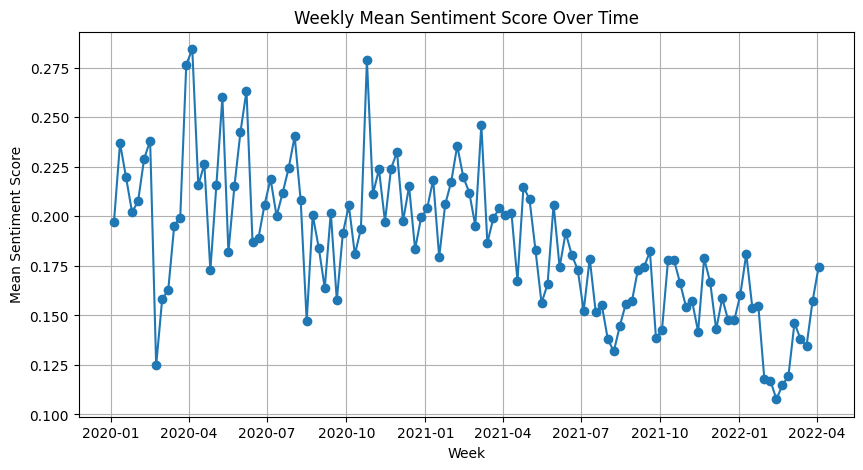

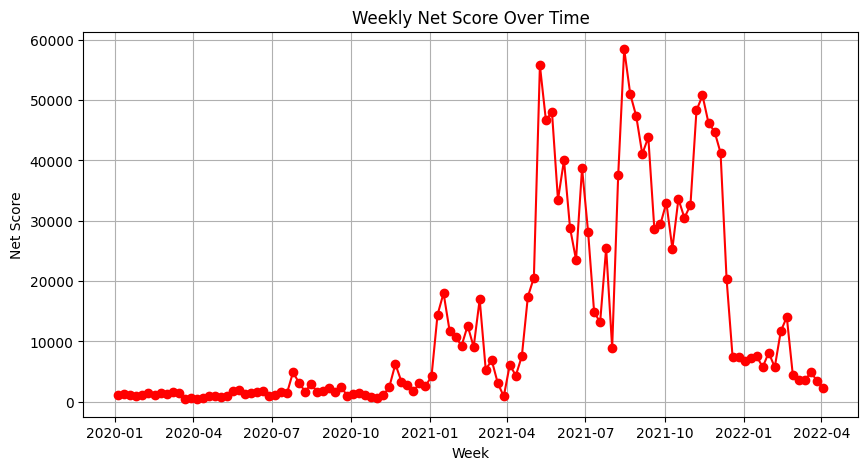

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(weekly_agg.index, weekly_agg['weighted_sentiment_score'], marker='o')
plt.title('Weekly Weighted Sentiment Score Over Time')
plt.xlabel('Week')
plt.ylabel('Weighted Sentiment Score')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(weekly_agg.index, weekly_agg['mean_sentiment'], marker='o')
plt.title('Weekly Mean Sentiment Score Over Time')
plt.xlabel('Week')
plt.ylabel('Mean Sentiment Score')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(weekly_agg.index, weekly_agg['net_score'],color="red", marker='o')
plt.title('Weekly Net Score Over Time')
plt.xlabel('Week')
plt.ylabel('Net Score')
plt.grid(True)
plt.show()